# Variability Measuring

Author: Hunter Chen, The University of Melbourne
Supervisor: Daniel Capurro, The University of Melbourne

Declaration: This file is part of the source code for the project 'Visualising the Healthcare Process Variability', conducted by Hunter Chen under the supervision of Daniel Capurro in 2022. You are welcome to further develop this code, and please include an acknowledgment to the author. Thank you for your cooperation.

One of the approach to analyse variance between traces is Hamming Distance

In [77]:
pip install fitter

  Created wheel for fitter: filename=fitter-1.5.1-py3-none-any.whl size=25575 sha256=36d2ba052f5e0fbfa21e8aefcb2b9c01b010dda003f118bf4cab2aedb211ebe4
  Stored in directory: /Users/hunterchen/Library/Caches/pip/wheels/fe/60/a8/447c66eae887b085b3e112358a5fa837104b6cd0d9de41ca71
Successfully built fitter
Note: you may need to restart the kernel to use updated packages.


In [78]:
from scipy.spatial.distance import hamming
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
import statistics
from fitter import Fitter

Hamming Distance is used to measure the difference between two strings of the same length. Here we use Hamming Distance(D) to measure the variance between two trace and integrate the result together.

In [2]:
trace1 = ['A', 'B', 'C', 'D', 'E']
trace2 = ['A', 'C', 'B', 'D', 'E']
trace3 = ['A', 'D', 'E', 'B', 'C']

trace4 = ['A', 'B']
trace4_padding = ['A', 'B', 'PAD', 'PAD', 'PAD']
D3 = hamming(trace1, trace4_padding)
print(D3)

0.6


In [3]:
D12 = hamming(trace1, trace2)
print(D12)

0.4


In [4]:
D11 = hamming(trace1, trace1)
print(D11)

0.0


We can see that the D for the same trace is 0. In this case we can build a matrix to hold the differences

In [5]:
def hamming_matrix(traces):
    row_count  = len(traces)
    distance_matrix = []

    for i in range(row_count):
        temp_distance = []
        for j in range(row_count):
            D = hamming(traces[i], traces[j])
            temp_distance.append(D)
        distance_matrix.append(temp_distance)

    return distance_matrix

In [6]:
traces = [
    ['A', 'B', 'C', 'D', 'E'],
    ['A', 'C', 'B', 'D', 'E'],
    ['A', 'D', 'E', 'B', 'C'],
]
testset_a = hamming_matrix(traces)
print(testset_a)

[[0.0, 0.4, 0.8], [0.4, 0.0, 0.8], [0.8, 0.8, 0.0]]


Then we will try to pop the encoded event log and use the method

In [7]:
with open('trace_matrix_integreated.txt', newline='') as file:
    encoded_events = file.readlines()

file.close()
print(encoded_events[:5])

['S1, A, LC11, MC12, LC24, MC40, LC52, LC64, LC85, LC108, LC115, LC118, LC125, M23, MC127, MC128, LC136, M1, M4, M22, LC150, LC154, M2, MC158, M3, MC164, MC167, M3, LC181, M3, M3, LC186, M1, M3, M1, M2, M3, M3, LC200, M3, M31, LC211, D\n', 'S1, LC11, A, LC20, LC29, LC38, MC56, LC77, LC88, LC98, LC104, MC105, LC113, LC119, M20, M15, LC133, LC136, MC139, M15, LC142, LC143, MC146, MC151, LC165, MC166, LC168, M29, LC179, M2, M7, LC184, D\n', 'S1, A, LC11, LC20, MC21, LC30, MC43, LC64, MC65, LC78, LC87, LC95, MC97, LC104, LC107, M25, MC110, M20, LC125, LC128, MC129, MC132, MC139, MC140, LC154, M2, LC156, MC158, M1, LC173, M1, LC186, D\n', 'S1, A, LC11, LC20, LC29, MC43, L2, LC55, LC68, LC77, LC85, M22, LC93, LC94, MC95, LC98, M20, LC99, LC106, LC120, LC126, LC131, MC132, LC140, MC141, LC153, LC155, LC160, MC161, MC163, M11, LC178, MC181, MC186, MC187, LC189, LC203, M1, MC204, LC217, M2, LC230, D\n', 'S1, A, LC11, LC20, MC34, LC43, LC64, LC85, LC91, LC97, MC99, LC105, MC106, LC107, LC121, M2

In [8]:
#remove the endline char
for line in encoded_events:
    line.strip()

print(encoded_events[1])

S1, LC11, A, LC20, LC29, LC38, MC56, LC77, LC88, LC98, LC104, MC105, LC113, LC119, M20, M15, LC133, LC136, MC139, M15, LC142, LC143, MC146, MC151, LC165, MC166, LC168, M29, LC179, M2, M7, LC184, D



In [9]:
#inspect the data
print(len(encoded_events[0]))

234


In [10]:
def find_max_len(event_log):
    max_len = 0
    for line in event_log:
        temp_max_len = len(line)
        if temp_max_len > max_len:
            max_len = temp_max_len
    return max_len

max_len = find_max_len(encoded_events)
print(max_len)

693


In [11]:
def auto_padding(event_log, max_len):
    padded_matrix = []
    padding = 'PAD'
    for line in event_log:
        trace = line.strip().split(',')
        if len(trace) < max_len:
            for i in range(max_len - len(trace)):
                trace.append(padding)
        padded_matrix.append(trace)
    return padded_matrix

In [12]:
traces2 = ['A, D, C\n', 'A, B, E, D\n']
testset_b = auto_padding(traces2, 5)
print(testset_b)

[['A', ' D', ' C', 'PAD', 'PAD'], ['A', ' B', ' E', ' D', 'PAD']]


In [13]:
padded_event = auto_padding(encoded_events, max_len)
print(padded_event[0])

['S1', ' A', ' LC11', ' MC12', ' LC24', ' MC40', ' LC52', ' LC64', ' LC85', ' LC108', ' LC115', ' LC118', ' LC125', ' M23', ' MC127', ' MC128', ' LC136', ' M1', ' M4', ' M22', ' LC150', ' LC154', ' M2', ' MC158', ' M3', ' MC164', ' MC167', ' M3', ' LC181', ' M3', ' M3', ' LC186', ' M1', ' M3', ' M1', ' M2', ' M3', ' M3', ' LC200', ' M3', ' M31', ' LC211', ' D', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD',

After padding the traces, we will feed the data into the function

In [14]:
trace_matrix = hamming_matrix(padded_event)

print(trace_matrix[:5])

[[0.0, 0.06060606060606061, 0.05483405483405483, 0.05627705627705628, 0.05772005772005772, 0.06637806637806638, 0.05916305916305916, 0.06782106782106782, 0.05916305916305916, 0.06060606060606061, 0.07936507936507936, 0.05627705627705628, 0.05772005772005772, 0.13131313131313133, 0.10245310245310245, 0.06060606060606061, 0.06493506493506493, 0.06060606060606061, 0.06060606060606061, 0.05627705627705628, 0.05772005772005772, 0.0707070707070707, 0.05483405483405483, 0.05916305916305916, 0.06060606060606061, 0.05627705627705628, 0.06060606060606061, 0.09235209235209235, 0.06060606060606061, 0.05772005772005772, 0.06060606060606061, 0.06060606060606061, 0.05483405483405483, 0.05916305916305916, 0.05627705627705628, 0.05916305916305916, 0.05772005772005772, 0.05483405483405483, 0.06060606060606061, 0.05916305916305916, 0.05627705627705628, 0.05627705627705628, 0.06493506493506493, 0.06204906204906205, 0.05916305916305916, 0.06926406926406926, 0.05627705627705628, 0.05772005772005772, 0.06493

**NEW: calculate the avg. and s.d. of the matrix**

In [73]:
#take out on row to do the calculation
trace_sample = trace_matrix[0]
print(trace_sample)

[0.0, 0.06060606060606061, 0.05483405483405483, 0.05627705627705628, 0.05772005772005772, 0.06637806637806638, 0.05916305916305916, 0.06782106782106782, 0.05916305916305916, 0.06060606060606061, 0.07936507936507936, 0.05627705627705628, 0.05772005772005772, 0.13131313131313133, 0.10245310245310245, 0.06060606060606061, 0.06493506493506493, 0.06060606060606061, 0.06060606060606061, 0.05627705627705628, 0.05772005772005772, 0.0707070707070707, 0.05483405483405483, 0.05916305916305916, 0.06060606060606061, 0.05627705627705628, 0.06060606060606061, 0.09235209235209235, 0.06060606060606061, 0.05772005772005772, 0.06060606060606061, 0.06060606060606061, 0.05483405483405483, 0.05916305916305916, 0.05627705627705628, 0.05916305916305916, 0.05772005772005772, 0.05483405483405483, 0.06060606060606061, 0.05916305916305916, 0.05627705627705628, 0.05627705627705628, 0.06493506493506493, 0.06204906204906205, 0.05916305916305916, 0.06926406926406926, 0.05627705627705628, 0.05772005772005772, 0.064935

In [74]:
#exam if the length is the same
print(len(trace_sample))

892


In [76]:
#calculate the avg and sd
print(statistics.mean(trace_sample))
print(statistics.stdev(trace_sample))

0.06126123502805117
0.010944515017267833


In [79]:
f = Fitter(trace_sample)
f.fit()

Fitting 103 distributions:  79%|███████▊  | 81/103 [00:49<00:20,  1.06it/s]/Users/hunterchen/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1801: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._pdf, _a, x, args=args)[0]
Fitting 103 distributions:  80%|███████▉  | 82/103 [00:54<00:42,  2.03s/it]WARNING:root:SKIPPED ncx2 distribution (taking more than 30 seconds)
/Users/hunterchen/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1801: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._pdf, _a, x, args=args)[0]
Fitting 103 distributions: 100%|██████████| 103/103 [01:26<00:00,  1.19it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
dgamma,4370.983968,512.648355,1438.015745,inf,0.302674,5.373541e-73
gennorm,12268.848597,519.329389,2358.626884,inf,0.286883,1.762416e-65
dweibull,23196.484130,-77.382786,2926.774960,inf,0.302669,5.402441e-73
loglaplace,25096.711603,1950.462571,2997.007566,inf,0.302691,5.272368e-73
laplace_asymmetric,32070.862939,1965.863072,3215.735863,inf,0.408210,6.969592e-135


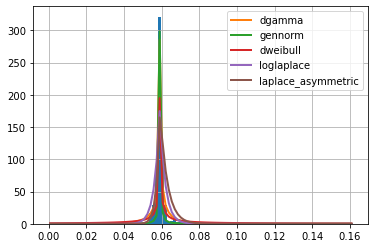

In [80]:
f.summary()

**NEW: we want to gather all the individuals with high variability together**

In [15]:
#first to create an index matrix
print(len(trace_matrix))

892


In [16]:
index_matrix = []
for i in range(1, 893):
    row_matrix = []
    for j in range(1, 893):
        row_matrix.append((i, j))
    index_matrix.append(row_matrix)
print(index_matrix[:5])

[[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 42), (1, 43), (1, 44), (1, 45), (1, 46), (1, 47), (1, 48), (1, 49), (1, 50), (1, 51), (1, 52), (1, 53), (1, 54), (1, 55), (1, 56), (1, 57), (1, 58), (1, 59), (1, 60), (1, 61), (1, 62), (1, 63), (1, 64), (1, 65), (1, 66), (1, 67), (1, 68), (1, 69), (1, 70), (1, 71), (1, 72), (1, 73), (1, 74), (1, 75), (1, 76), (1, 77), (1, 78), (1, 79), (1, 80), (1, 81), (1, 82), (1, 83), (1, 84), (1, 85), (1, 86), (1, 87), (1, 88), (1, 89), (1, 90), (1, 91), (1, 92), (1, 93), (1, 94), (1, 95), (1, 96), (1, 97), (1, 98), (1, 99), (1, 100), (1, 101), (1, 102), (1, 103), (1, 104), (1, 105), (1, 106), (1, 107), (1, 108), (1, 109), (1, 110), (1, 11

First, we need to sort the matrix and list all the traces in descending order to get the top 5%

In [17]:
def reorganize_matrix(matrix, index_matrix):
    a, b = zip(*sorted(zip(matrix,index_matrix), reverse=True))
    return a, b

In [18]:
matrix, index_matrix = reorganize_matrix(trace_matrix, index_matrix)

In [19]:
print(index_matrix[:5])

([(57, 1), (57, 2), (57, 3), (57, 4), (57, 5), (57, 6), (57, 7), (57, 8), (57, 9), (57, 10), (57, 11), (57, 12), (57, 13), (57, 14), (57, 15), (57, 16), (57, 17), (57, 18), (57, 19), (57, 20), (57, 21), (57, 22), (57, 23), (57, 24), (57, 25), (57, 26), (57, 27), (57, 28), (57, 29), (57, 30), (57, 31), (57, 32), (57, 33), (57, 34), (57, 35), (57, 36), (57, 37), (57, 38), (57, 39), (57, 40), (57, 41), (57, 42), (57, 43), (57, 44), (57, 45), (57, 46), (57, 47), (57, 48), (57, 49), (57, 50), (57, 51), (57, 52), (57, 53), (57, 54), (57, 55), (57, 56), (57, 57), (57, 58), (57, 59), (57, 60), (57, 61), (57, 62), (57, 63), (57, 64), (57, 65), (57, 66), (57, 67), (57, 68), (57, 69), (57, 70), (57, 71), (57, 72), (57, 73), (57, 74), (57, 75), (57, 76), (57, 77), (57, 78), (57, 79), (57, 80), (57, 81), (57, 82), (57, 83), (57, 84), (57, 85), (57, 86), (57, 87), (57, 88), (57, 89), (57, 90), (57, 91), (57, 92), (57, 93), (57, 94), (57, 95), (57, 96), (57, 97), (57, 98), (57, 99), (57, 100), (57, 1

Then, we need to get the bottom 5%

In [20]:
def reorganize_matrix_rev(matrix, index_matrix):
    a, b = zip(*sorted(zip(matrix,index_matrix), reverse=False))
    return a, b

In [21]:
matrix_rev, index_matrix_rev = reorganize_matrix_rev(trace_matrix, index_matrix)

In [22]:
print(index_matrix_rev[:5])

([(57, 1), (57, 2), (57, 3), (57, 4), (57, 5), (57, 6), (57, 7), (57, 8), (57, 9), (57, 10), (57, 11), (57, 12), (57, 13), (57, 14), (57, 15), (57, 16), (57, 17), (57, 18), (57, 19), (57, 20), (57, 21), (57, 22), (57, 23), (57, 24), (57, 25), (57, 26), (57, 27), (57, 28), (57, 29), (57, 30), (57, 31), (57, 32), (57, 33), (57, 34), (57, 35), (57, 36), (57, 37), (57, 38), (57, 39), (57, 40), (57, 41), (57, 42), (57, 43), (57, 44), (57, 45), (57, 46), (57, 47), (57, 48), (57, 49), (57, 50), (57, 51), (57, 52), (57, 53), (57, 54), (57, 55), (57, 56), (57, 57), (57, 58), (57, 59), (57, 60), (57, 61), (57, 62), (57, 63), (57, 64), (57, 65), (57, 66), (57, 67), (57, 68), (57, 69), (57, 70), (57, 71), (57, 72), (57, 73), (57, 74), (57, 75), (57, 76), (57, 77), (57, 78), (57, 79), (57, 80), (57, 81), (57, 82), (57, 83), (57, 84), (57, 85), (57, 86), (57, 87), (57, 88), (57, 89), (57, 90), (57, 91), (57, 92), (57, 93), (57, 94), (57, 95), (57, 96), (57, 97), (57, 98), (57, 99), (57, 100), (57, 1

In [23]:
print(matrix_rev[:5])

([0.0, 0.06060606060606061, 0.05483405483405483, 0.05627705627705628, 0.05772005772005772, 0.06637806637806638, 0.05916305916305916, 0.06782106782106782, 0.05916305916305916, 0.06060606060606061, 0.07936507936507936, 0.05627705627705628, 0.05772005772005772, 0.13131313131313133, 0.10245310245310245, 0.06060606060606061, 0.06493506493506493, 0.06060606060606061, 0.06060606060606061, 0.05627705627705628, 0.05772005772005772, 0.0707070707070707, 0.05483405483405483, 0.05916305916305916, 0.06060606060606061, 0.05627705627705628, 0.06060606060606061, 0.09235209235209235, 0.06060606060606061, 0.05772005772005772, 0.06060606060606061, 0.06060606060606061, 0.05483405483405483, 0.05916305916305916, 0.05627705627705628, 0.05916305916305916, 0.05772005772005772, 0.05483405483405483, 0.06060606060606061, 0.05916305916305916, 0.05627705627705628, 0.05627705627705628, 0.06493506493506493, 0.06204906204906205, 0.05916305916305916, 0.06926406926406926, 0.05627705627705628, 0.05772005772005772, 0.06493

In [ ]:
print(matrix[:5])

After the matrix is generated, we are able to visualise the data

In [32]:
trace_matrix_np = np.array(trace_matrix)

In [33]:
print(trace_matrix_np)

[[0.         0.06060606 0.05483405 ... 0.05916306 0.06204906 0.05916306]
 [0.06060606 0.         0.04329004 ... 0.04617605 0.04761905 0.04617605]
 [0.05483405 0.04329004 0.         ... 0.04473304 0.04761905 0.04473304]
 ...
 [0.05916306 0.04617605 0.04473304 ... 0.         0.00721501 0.        ]
 [0.06204906 0.04761905 0.04761905 ... 0.00721501 0.         0.00721501]
 [0.05916306 0.04617605 0.04473304 ... 0.         0.00721501 0.        ]]


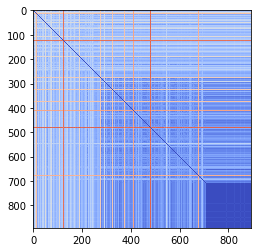

In [34]:
plt.imshow(trace_matrix_np, cmap='coolwarm', interpolation='nearest')
plt.show()

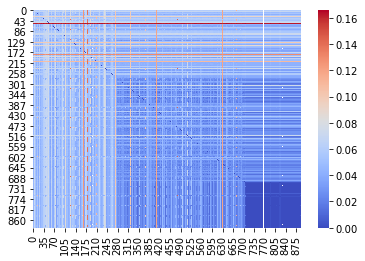

In [48]:
ax = sns.heatmap(trace_matrix_np, cmap='coolwarm',linewidth=0.00001)
plt.show()

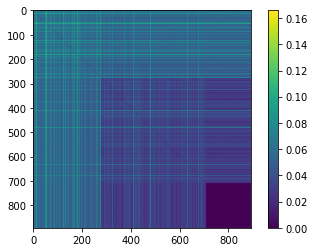

In [58]:
def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap='viridis')
    plt.colorbar()
    plt.show()

heatmap2d(trace_matrix_np)

In [59]:
a = trace_matrix_np[:500]

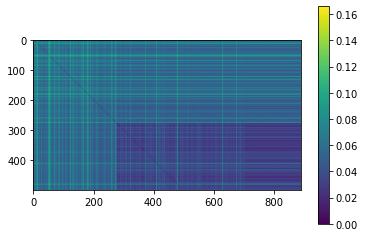

In [60]:
heatmap2d(a)

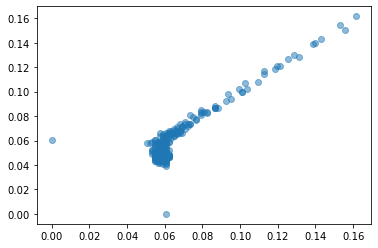

In [61]:
a = trace_matrix_np[0]
b = trace_matrix_np[1]

plt.scatter(a, b, alpha=0.5, cmap='nipy_spectral')
plt.show()

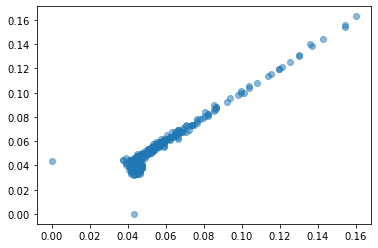

In [50]:
c = trace_matrix_np[49]
d = trace_matrix_np[180]

plt.scatter(c, d, alpha=0.5, cmap='nipy_spectral')
plt.show()

NEW: Now we visualise the reorderred matrix

In [23]:
matrix_np = np.array(matrix)

In [24]:
print(matrix_np)

[[0.16161616 0.16161616 0.16017316 ... 0.16305916 0.16594517 0.16305916]
 [0.15584416 0.15007215 0.15584416 ... 0.15584416 0.15728716 0.15584416]
 [0.15295815 0.15440115 0.15440115 ... 0.15440115 0.15295815 0.15440115]
 ...
 [0.05194805 0.05772006 0.05916306 ... 0.05916306 0.06060606 0.05916306]
 [0.05050505 0.05772006 0.05627706 ... 0.05627706 0.05916306 0.05627706]
 [0.         0.06060606 0.05483405 ... 0.05916306 0.06204906 0.05916306]]


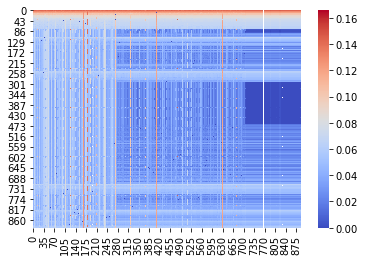

In [26]:
ax = sns.heatmap(matrix_np, cmap='coolwarm',linewidth=0.00001)
plt.show()

Next step is to look at the top 5% variants and bottom 5% variants

In [28]:
#Altogether we have 892 patients in the cohort so 5% is roughly 40 people. In this case, the number can be a bit too many, we further narrow down to 20 in this stage.
top_5percent_variant = matrix[:20]
top_5percent_variant_index = index_matrix[:20]

In [29]:
print(top_5percent_variant_index)

([(57, 1), (57, 2), (57, 3), (57, 4), (57, 5), (57, 6), (57, 7), (57, 8), (57, 9), (57, 10), (57, 11), (57, 12), (57, 13), (57, 14), (57, 15), (57, 16), (57, 17), (57, 18), (57, 19), (57, 20), (57, 21), (57, 22), (57, 23), (57, 24), (57, 25), (57, 26), (57, 27), (57, 28), (57, 29), (57, 30), (57, 31), (57, 32), (57, 33), (57, 34), (57, 35), (57, 36), (57, 37), (57, 38), (57, 39), (57, 40), (57, 41), (57, 42), (57, 43), (57, 44), (57, 45), (57, 46), (57, 47), (57, 48), (57, 49), (57, 50), (57, 51), (57, 52), (57, 53), (57, 54), (57, 55), (57, 56), (57, 57), (57, 58), (57, 59), (57, 60), (57, 61), (57, 62), (57, 63), (57, 64), (57, 65), (57, 66), (57, 67), (57, 68), (57, 69), (57, 70), (57, 71), (57, 72), (57, 73), (57, 74), (57, 75), (57, 76), (57, 77), (57, 78), (57, 79), (57, 80), (57, 81), (57, 82), (57, 83), (57, 84), (57, 85), (57, 86), (57, 87), (57, 88), (57, 89), (57, 90), (57, 91), (57, 92), (57, 93), (57, 94), (57, 95), (57, 96), (57, 97), (57, 98), (57, 99), (57, 100), (57, 1

In [31]:
top_5percent_variant_index_cleaned = []
for i in range(len(top_5percent_variant_index)):
    top_5percent_variant_index_cleaned.append(top_5percent_variant_index[i][0][0])
print(top_5percent_variant_index_cleaned)

[57, 54, 87, 481, 125, 182, 14, 184, 169, 161, 632, 412, 261, 678, 213, 375, 15, 135, 326, 276]


In [36]:
with open('patient_cohort_demographic_CCI.csv', newline='') as file_patient:
    patients = file_patient.readlines()

file_patient.close()
print(patients[1:5])

['10002013,23581541,F,57,Medicare,ENGLISH,SINGLE,OTHER,8\n', '10002527,29112696,M,50,Other,ENGLISH,SINGLE,WHITE,1\n', '10011398,27505812,M,67,Other,ENGLISH,MARRIED,HISPANIC/LATINO,3\n', '10023771,20044587,M,70,Medicare,ENGLISH,MARRIED,WHITE,5\n']


In [37]:
print(patients[57])

10710573,29923776,M,55,Medicaid,?,SINGLE,ASIAN,4



In [38]:
print(patients[54])

10683486,20088888,M,69,Medicare,ENGLISH,MARRIED,WHITE,7



Then, we try to get the bottom 20 patients (roughly 2.5%)

In [25]:
bottom_5percent_variant = matrix[-20:]
bottom_5percent_variant_index = index_matrix[-20:]

In [26]:
print(bottom_5percent_variant_index)

([(38, 1), (38, 2), (38, 3), (38, 4), (38, 5), (38, 6), (38, 7), (38, 8), (38, 9), (38, 10), (38, 11), (38, 12), (38, 13), (38, 14), (38, 15), (38, 16), (38, 17), (38, 18), (38, 19), (38, 20), (38, 21), (38, 22), (38, 23), (38, 24), (38, 25), (38, 26), (38, 27), (38, 28), (38, 29), (38, 30), (38, 31), (38, 32), (38, 33), (38, 34), (38, 35), (38, 36), (38, 37), (38, 38), (38, 39), (38, 40), (38, 41), (38, 42), (38, 43), (38, 44), (38, 45), (38, 46), (38, 47), (38, 48), (38, 49), (38, 50), (38, 51), (38, 52), (38, 53), (38, 54), (38, 55), (38, 56), (38, 57), (38, 58), (38, 59), (38, 60), (38, 61), (38, 62), (38, 63), (38, 64), (38, 65), (38, 66), (38, 67), (38, 68), (38, 69), (38, 70), (38, 71), (38, 72), (38, 73), (38, 74), (38, 75), (38, 76), (38, 77), (38, 78), (38, 79), (38, 80), (38, 81), (38, 82), (38, 83), (38, 84), (38, 85), (38, 86), (38, 87), (38, 88), (38, 89), (38, 90), (38, 91), (38, 92), (38, 93), (38, 94), (38, 95), (38, 96), (38, 97), (38, 98), (38, 99), (38, 100), (38, 1

In [27]:
bottom_5percent_variant_index_cleaned = []
for i in range(len(bottom_5percent_variant_index)):
    bottom_5percent_variant_index_cleaned.append(bottom_5percent_variant_index[i][0][0])
print(bottom_5percent_variant_index_cleaned)

[38, 129, 128, 188, 150, 155, 143, 260, 123, 221, 267, 3, 148, 175, 151, 209, 91, 308, 691, 1]


Till this stage, we find out that the data is not enough, we are going to get the top 5%, top 10% and top 20%

In [28]:
#What we had was actually top 2.5%, this time we will have the real top 5%, which is 40
top_5_real_percent_variant = matrix[:40]
top_5_real_percent_variant_index = index_matrix[:40]

In [29]:
top_5_real_percent_variant_index_cleaned = []
for i in range(len(top_5_real_percent_variant_index)):
    top_5_real_percent_variant_index_cleaned.append(top_5_real_percent_variant_index[i][0][0])
print(top_5_real_percent_variant_index_cleaned)

[57, 54, 87, 481, 125, 182, 14, 184, 169, 161, 632, 412, 261, 678, 213, 375, 15, 135, 326, 276, 78, 277, 28, 71, 191, 147, 165, 192, 109, 52, 70, 198, 11, 239, 111, 265, 76, 126, 134, 53]


In [31]:
#now top 10%
top_10_percent_variant = matrix[:80]
top_10_percent_variant_index = index_matrix[:80]

In [32]:
top_10_percent_variant_index_cleaned = []
for i in range(len(top_10_percent_variant_index)):
    top_10_percent_variant_index_cleaned.append(top_10_percent_variant_index[i][0][0])
print(top_10_percent_variant_index_cleaned)

[57, 54, 87, 481, 125, 182, 14, 184, 169, 161, 632, 412, 261, 678, 213, 375, 15, 135, 326, 276, 78, 277, 28, 71, 191, 147, 165, 192, 109, 52, 70, 198, 11, 239, 111, 265, 76, 126, 134, 53, 275, 98, 242, 311, 102, 22, 293, 251, 156, 46, 516, 194, 8, 132, 6, 142, 176, 411, 263, 222, 72, 17, 43, 49, 74, 200, 99, 547, 244, 179, 63, 145, 154, 433, 144, 418, 62, 124, 44, 694]


In [33]:
#now top 20%
top_20_percent_variant = matrix[:160]
top_20_percent_variant_index = index_matrix[:160]

In [34]:
top_20_percent_variant_index_cleaned = []
for i in range(len(top_20_percent_variant_index)):
    top_20_percent_variant_index_cleaned.append(top_20_percent_variant_index[i][0][0])
print(top_20_percent_variant_index_cleaned)

[57, 54, 87, 481, 125, 182, 14, 184, 169, 161, 632, 412, 261, 678, 213, 375, 15, 135, 326, 276, 78, 277, 28, 71, 191, 147, 165, 192, 109, 52, 70, 198, 11, 239, 111, 265, 76, 126, 134, 53, 275, 98, 242, 311, 102, 22, 293, 251, 156, 46, 516, 194, 8, 132, 6, 142, 176, 411, 263, 222, 72, 17, 43, 49, 74, 200, 99, 547, 244, 179, 63, 145, 154, 433, 144, 418, 62, 124, 44, 694, 101, 769, 880, 866, 850, 825, 822, 811, 792, 767, 736, 709, 307, 891, 754, 591, 440, 317, 688, 583, 608, 557, 534, 435, 654, 611, 704, 321, 597, 634, 451, 18, 170, 39, 177, 233, 121, 94, 31, 84, 253, 255, 480, 16, 96, 32, 29, 625, 386, 382, 462, 887, 506, 514, 289, 649, 641, 663, 10, 112, 580, 66, 180, 309, 327, 684, 503, 677, 337, 476, 666, 528, 509, 379, 304, 352, 273, 477, 501, 237]


Then the bottom 5%, bottom 10% and bottom 20%

In [39]:
#The bottom 5% is around the last 40 patients
bottom_5_real_percent_variant = matrix[-40:]
bottom_5_real_percent_variant_index = index_matrix[-40:]

In [40]:
bottom_5_real_percent_variant_index_cleaned = []
for i in range(len(bottom_5_real_percent_variant_index)):
    bottom_5_real_percent_variant_index_cleaned.append(bottom_5_real_percent_variant_index[i][0][0])
print(bottom_5_real_percent_variant_index_cleaned)

[246, 172, 190, 42, 35, 212, 264, 107, 47, 250, 245, 50, 201, 23, 266, 158, 166, 401, 248, 33, 38, 129, 128, 188, 150, 155, 143, 260, 123, 221, 267, 3, 148, 175, 151, 209, 91, 308, 691, 1]


In [41]:
#bottom 10%
bottom_10_real_percent_variant = matrix[-80:]
bottom_10_real_percent_variant_index = index_matrix[-80:]

In [42]:
bottom_10_real_percent_variant_index_cleaned = []
for i in range(len(bottom_10_real_percent_variant_index)):
    bottom_10_real_percent_variant_index_cleaned.append(bottom_10_real_percent_variant_index[i][0][0])
print(bottom_10_real_percent_variant_index_cleaned)

[120, 615, 115, 65, 77, 122, 37, 149, 160, 211, 138, 210, 41, 4, 90, 218, 214, 268, 97, 139, 356, 131, 186, 153, 68, 51, 334, 162, 12, 238, 493, 647, 140, 223, 20, 26, 256, 252, 157, 225, 246, 172, 190, 42, 35, 212, 264, 107, 47, 250, 245, 50, 201, 23, 266, 158, 166, 401, 248, 33, 38, 129, 128, 188, 150, 155, 143, 260, 123, 221, 267, 3, 148, 175, 151, 209, 91, 308, 691, 1]


In [43]:
#bottom 20%
bottom_20_real_percent_variant = matrix[-160:]
bottom_20_real_percent_variant_index = index_matrix[-160:]

In [44]:
bottom_20_real_percent_variant_index_cleaned = []
for i in range(len(bottom_20_real_percent_variant_index)):
    bottom_20_real_percent_variant_index_cleaned.append(bottom_20_real_percent_variant_index[i][0][0])
print(bottom_20_real_percent_variant_index_cleaned)

[83, 133, 240, 358, 5, 116, 56, 86, 669, 100, 257, 113, 21, 199, 432, 197, 345, 607, 259, 185, 227, 103, 687, 95, 48, 363, 369, 399, 351, 488, 526, 299, 577, 406, 468, 472, 348, 357, 552, 546, 413, 544, 306, 581, 318, 287, 486, 391, 341, 572, 463, 549, 556, 550, 434, 474, 598, 626, 224, 439, 279, 301, 553, 204, 173, 146, 230, 85, 195, 196, 127, 118, 380, 650, 13, 332, 323, 80, 551, 59, 120, 615, 115, 65, 77, 122, 37, 149, 160, 211, 138, 210, 41, 4, 90, 218, 214, 268, 97, 139, 356, 131, 186, 153, 68, 51, 334, 162, 12, 238, 493, 647, 140, 223, 20, 26, 256, 252, 157, 225, 246, 172, 190, 42, 35, 212, 264, 107, 47, 250, 245, 50, 201, 23, 266, 158, 166, 401, 248, 33, 38, 129, 128, 188, 150, 155, 143, 260, 123, 221, 267, 3, 148, 175, 151, 209, 91, 308, 691, 1]


Then, we read the patient data

In [46]:
with open('Complete_Patients.csv', newline='') as file_cpmplete_patient:
    complete_patients = file_cpmplete_patient.readlines()

file_cpmplete_patient.close()
print(complete_patients[1:5])

['10002013,23581541,F,57,Medicare,OTHER,8,5,2160-05-18 07:45:00,2160-05-23 13:30:00,,2,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0\n', '10002527,29112696,M,50,Other,WHITE,1,5,2136-03-24 12:30:00,2136-03-29 13:40:00,,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0\n', '10011398,27505812,M,67,Other,HISPANIC/LATINO,3,4,2146-12-15 07:15:00,2146-12-19 13:37:00,,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0\n', '10023771,20044587,M,70,Medicare,WHITE,5,5,2113-08-25 07:15:00,2113-08-30 14:15:00,,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0\n']


Extra the top and bottom % patients

In [60]:
#top 20%
top_20_patients = []
for i in top_20_percent_variant_index_cleaned:
    top_20_patients.append(complete_patients[i])
print(top_20_patients[:5])

['10710573,29923776,M,55,Medicaid,ASIAN,4,18,2114-04-17 07:30:00,2114-05-05 14:52:00,,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0\n', '10683486,20088888,M,69,Medicare,WHITE,7,8,2143-05-26 11:15:00,2143-06-03 13:00:00,,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0\n', '11076206,20326682,F,63,Medicare,WHITE,7,10,2188-01-18 07:15:00,2188-01-28 17:02:00,,3,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0\n', '15520282,23427760,M,72,Medicare,WHITE,6,22,2144-01-06 11:45:00,2144-01-28 13:55:00,,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0\n', '11464841,23320938,M,64,Other,WHITE,4,19,2187-12-19 15:34:00,2188-01-07 19:40:00,,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0\n']


In [58]:
#bottom 20%
bottom_20_patients = []
for i in bottom_20_real_percent_variant_index_cleaned:
    bottom_20_patients.append(complete_patients[i])
print(bottom_20_patients[-5:])

['12546810,20343600,M,61,Other,WHITE,4,5,2167-03-07 07:15:00,2167-03-12 14:30:00,,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0\n', '11099774,29783619,M,65,Other,WHITE,4,4,2178-05-04 07:15:00,2178-05-08 14:30:00,,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0\n', '13751917,25197895,M,68,Other,WHITE,4,7,2170-09-14 12:15:00,2170-09-21 13:40:00,,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0\n', '17672672,23262224,M,52,Other,OTHER,6,13,2158-10-14 07:15:00,2158-10-27 11:30:00,,2,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0\n', '10002013,23581541,F,57,Medicare,OTHER,8,5,2160-05-18 07:45:00,2160-05-23 13:30:00,,2,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0\n']


In [65]:
#write to the document
write_file = open('variant_20_patients_top.csv', 'w')
writer = csv.writer(write_file)
writer.writerow(['PatientID','HosptialAdmissionID','Gender','Age','Insurance','Ethnicity','CCI','LengthOfStay','AdmissionTime','DischargeTime','DeathTime','AgeScore','MyocardialInfarct','CongestiveHeartFailure','PeripheralVascularDisease','CerebrovascularDisease','Dementia','ChronicPulmonaryDisease','RheumaticDisease','PepticUlcerDisease','MildLiverDisease','DiabetesWithoutCC','DiabetesWithCC','Paraplegia','RenalDisease','MalignantCancer','SevereLiverDisease','MetastaticSolidTumor','Aids'])
for row in top_20_patients:
    writer.writerow([row])
write_file.close()

In [66]:
#write to the document, REMEMBER to use excel to seperate the data
write_file = open('variant_20_patients_btm.csv', 'w')
writer = csv.writer(write_file)
for row in bottom_20_patients:
    writer.writerow([row])
write_file.close()

Now we need to include the DRG codes

In [67]:
with open('Complete_Patient_DRG_incl.csv', newline='') as file_cpmplete_patient_DRG:
    complete_patients_DRG = file_cpmplete_patient_DRG.readlines()

file_cpmplete_patient_DRG.close()
print(complete_patients_DRG[1:5])

['10002013,23581541,F,57,Medicare,OTHER,8,5,2160-05-18 07:45:00,2160-05-23 13:30:00,,2,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,166,CORONARY BYPASS W/O AMI OR COMPLEX PDX,3,2\n', '10002527,29112696,M,50,Other,WHITE,1,5,2136-03-24 12:30:00,2136-03-29 13:40:00,,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,CORONARY BYPASS W/O AMI OR COMPLEX PDX,1,1\n', '10011398,27505812,M,67,Other,HISPANIC/LATINO,3,4,2146-12-15 07:15:00,2146-12-19 13:37:00,,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,CORONARY BYPASS W/O AMI OR COMPLEX PDX,2,1\n', '10023771,20044587,M,70,Medicare,WHITE,5,5,2113-08-25 07:15:00,2113-08-30 14:15:00,,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,166,CORONARY BYPASS W/O AMI OR COMPLEX PDX,2,2\n']


In [68]:
#top 20%
top_20_patients_DRG = []
for i in top_20_percent_variant_index_cleaned:
    top_20_patients_DRG.append(complete_patients_DRG[i])
print(top_20_patients_DRG[:5])

['10710573,29923776,M,55,Medicaid,ASIAN,4,18,2114-04-17 07:30:00,2114-05-05 14:52:00,,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,166,CORONARY BYPASS W/O AMI OR COMPLEX PDX,3,3\n', '10683486,20088888,M,69,Medicare,WHITE,7,8,2143-05-26 11:15:00,2143-06-03 13:00:00,,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,166,CORONARY BYPASS W/O AMI OR COMPLEX PDX,3,3\n', '11076206,20326682,F,63,Medicare,WHITE,7,10,2188-01-18 07:15:00,2188-01-28 17:02:00,,3,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,166,CORONARY BYPASS W/O AMI OR COMPLEX PDX,3,2\n', '15520282,23427760,M,72,Medicare,WHITE,6,22,2144-01-06 11:45:00,2144-01-28 13:55:00,,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,166,CORONARY BYPASS W/O AMI OR COMPLEX PDX,2,1\n', '11464841,23320938,M,64,Other,WHITE,4,19,2187-12-19 15:34:00,2188-01-07 19:40:00,,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,165,CORONARY BYPASS W AMI OR COMPLEX PDX,4,3\n']


In [69]:
#bottom 20%
bottom_20_patients_DRG = []
for i in bottom_20_real_percent_variant_index_cleaned:
    bottom_20_patients_DRG.append(complete_patients_DRG[i])
print(bottom_20_patients_DRG[-5:])

['12546810,20343600,M,61,Other,WHITE,4,5,2167-03-07 07:15:00,2167-03-12 14:30:00,,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,165,CORONARY BYPASS W AMI OR COMPLEX PDX,2,1\n', '11099774,29783619,M,65,Other,WHITE,4,4,2178-05-04 07:15:00,2178-05-08 14:30:00,,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,166,CORONARY BYPASS W/O AMI OR COMPLEX PDX,2,1\n', '13751917,25197895,M,68,Other,WHITE,4,7,2170-09-14 12:15:00,2170-09-21 13:40:00,,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,166,CORONARY BYPASS W/O AMI OR COMPLEX PDX,2,1\n', '17672672,23262224,M,52,Other,OTHER,6,13,2158-10-14 07:15:00,2158-10-27 11:30:00,,2,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,166,CORONARY BYPASS W/O AMI OR COMPLEX PDX,3,3\n', '10002013,23581541,F,57,Medicare,OTHER,8,5,2160-05-18 07:45:00,2160-05-23 13:30:00,,2,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,166,CORONARY BYPASS W/O AMI OR COMPLEX PDX,3,2\n']


In [70]:
#write to the document
write_file = open('variant_20_patients_top_DRG.csv', 'w')
writer = csv.writer(write_file)
writer.writerow(['PatientID','HosptialAdmissionID','Gender','Age','Insurance','Ethnicity','CCI','LengthOfStay','AdmissionTime','DischargeTime','DeathTime','AgeScore','MyocardialInfarct','CongestiveHeartFailure','PeripheralVascularDisease','CerebrovascularDisease','Dementia','ChronicPulmonaryDisease','RheumaticDisease','PepticUlcerDisease','MildLiverDisease','DiabetesWithoutCC','DiabetesWithCC','Paraplegia','RenalDisease','MalignantCancer','SevereLiverDisease','MetastaticSolidTumor','Aids'])
for row in top_20_patients_DRG:
    writer.writerow([row])
write_file.close()

In [71]:
#write to the document, REMEMBER to use excel to seperate the data
write_file = open('variant_20_patients_btm_DRG.csv', 'w')
writer = csv.writer(write_file)
for row in bottom_20_patients_DRG:
    writer.writerow([row])
write_file.close()